# Stopnja kriminala v Sloveniji po letih v korelaciji z ostalimi podatki

Podatkovno Rudarjenje, 2022/23

**Sašo Primožič, Ambrož Perovšek, Andraž Adamič, Matija Ječnik**

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [113]:
kd2010 = pd.read_csv("podatki/kd2010.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2011 = pd.read_csv("podatki/kd2011.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2012 = pd.read_csv("podatki/kd2012.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2014 = pd.read_csv("podatki/kd2014.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2015 = pd.read_csv("podatki/kd2015.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2017 = pd.read_csv("podatki/kd2017.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2018 = pd.read_csv("podatki/kd2018.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd2019 = pd.read_csv("podatki/kd2019.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
kd = pd.concat([kd2010, kd2011, kd2012, kd2013, kd2014, kd2015, kd2016, kd2017, kd2018, kd2019], names=['letoVnosa'], keys=['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019',])
# kd = kd.drop("ZaporednaStevilkaKD", axis="columns")

/var/folders/p8/zvqyy09x6qv62ygx62vw6v7c0000gn/T/ipykernel_32174/969793939.py:4: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2013 = pd.read_csv("podatki/kd2013.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})
/var/folders/p8/zvqyy09x6qv62ygx62vw6v7c0000gn/T/ipykernel_32174/969793939.py:7: DtypeWarning: Columns (14,18) have mixed types. Specify dtype option on import or set low_memory=False.
  kd2016 = pd.read_csv("podatki/kd2016.csv", delimiter=";", encoding="latin-1", dtype={'MesecStoritve': str})


In [114]:
kd['MesecStoritve'] = pd.to_datetime(kd['MesecStoritve'], format='%m.%Y', exact=True)
kd = kd.rename(columns={'MesecStoritve': 'datumStoritve'})
kd.sort_values(by=['datumStoritve', 'UraStoritve'], inplace=True)
# kd.reset_index(drop=True, inplace=True)

<BarContainer object of 7 artists>

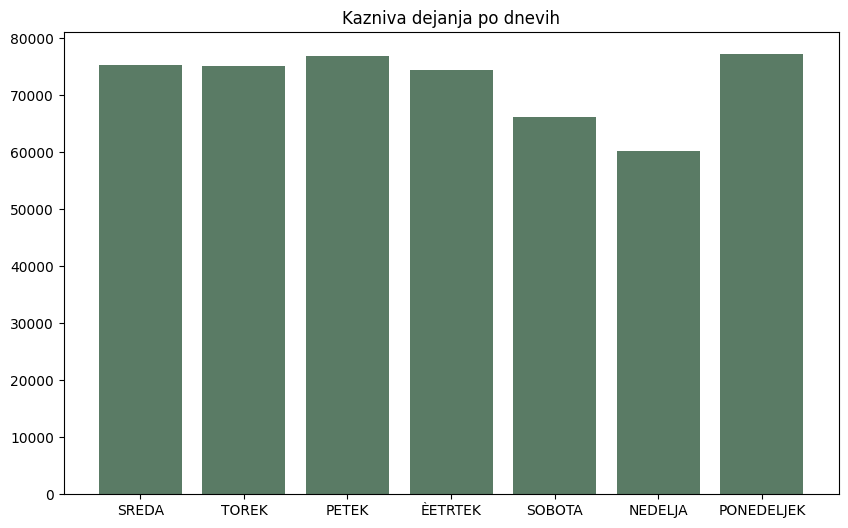

In [115]:
# print(kd[1:10])

dnevi = {}
for dan in kd['DanVTednu'].unique():
    dnevi[dan] = np.unique(np.asarray(kd.loc[kd['DanVTednu'] == dan, ['ZaporednaStevilkaKD']]))
# dnevi['SREDA'].size
plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja po dnevih')
plt.bar(dnevi.keys(), [d.size for d in dnevi.values()], color='#5A7B65')

<BarContainer object of 10 artists>

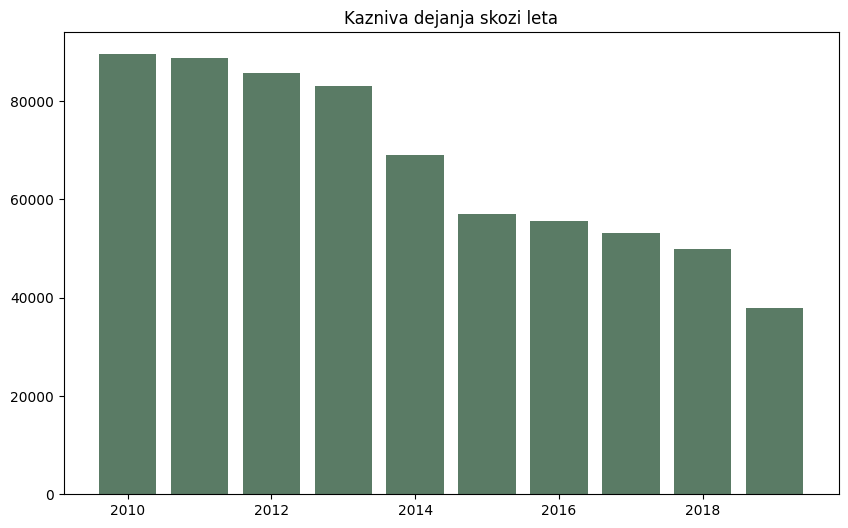

In [116]:
dan = []
for datum in range(2010, 2020):
    dan.append(np.unique(np.asarray(kd.loc[(kd['datumStoritve'] > str(datum) + '-01-01') & (kd['datumStoritve'] < str(datum + 1) + '-01-01'), ['ZaporednaStevilkaKD']])).size)

plt.figure(figsize=(10,6))
plt.title('Kazniva dejanja skozi leta')
plt.bar(range(2010, 2020), dan, color='#5A7B65')

<BarContainer object of 2 artists>

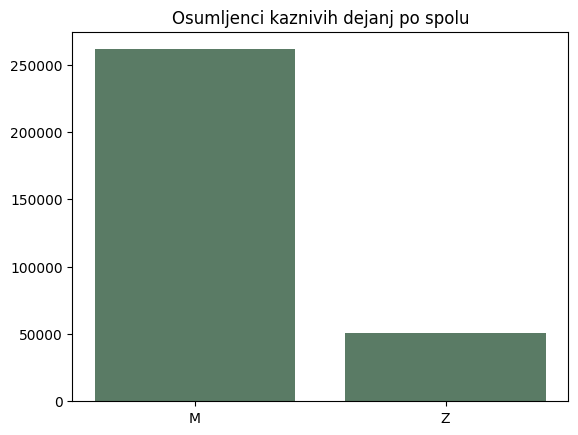

In [117]:
plt.title('Osumljenci kaznivih dejanj po spolu')
plt.bar(['M', 'Z'], [kd.query("Spol == 'MO\x8aKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size, kd.query("Spol == '\x8eENSKI' & (VrstaOsebe == 'NEOVADENI OSUMLJENEC (ARHIV)' | VrstaOsebe == 'OVADENI OSUMLJENEC')")['Spol'].size], color='#5A7B65')
# kd['VrstaOsebe'].unique()
# np.unique(np.asarray(kd.loc[(kd['Spol'] == 'MO\x8aKI'), ['ZaporednaStevilkaKD']])).size


<BarContainer object of 2 artists>

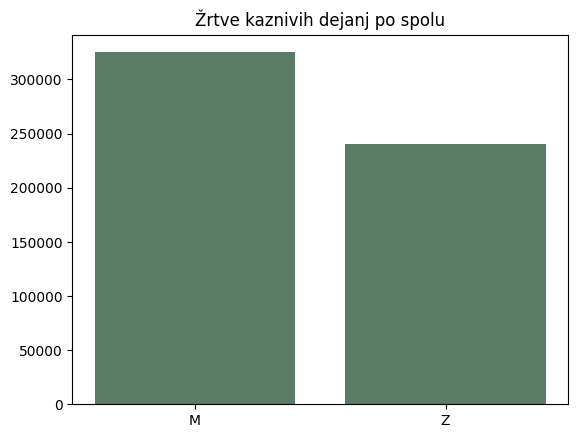

In [118]:
plt.title('Žrtve kaznivih dejanj po spolu')
plt.bar(['M', 'Z'], [kd.query("Spol == 'MO\x8aKI' & VrstaOsebe == '\x8eRTEV'")['Spol'].size, kd.query("Spol == '\x8eENSKI' & VrstaOsebe == '\x8eRTEV'")['Spol'].size], color='#5A7B65')

/var/folders/p8/zvqyy09x6qv62ygx62vw6v7c0000gn/T/ipykernel_32174/3998074284.py:16: UserWarning: The label '_nolegend_' of <BarContainer object of 24 artists> starts with '_'. It is thus excluded from the legend.
  plt.legend(['_nolegend_', 'Maksimalno število', 'Minimalno število'])


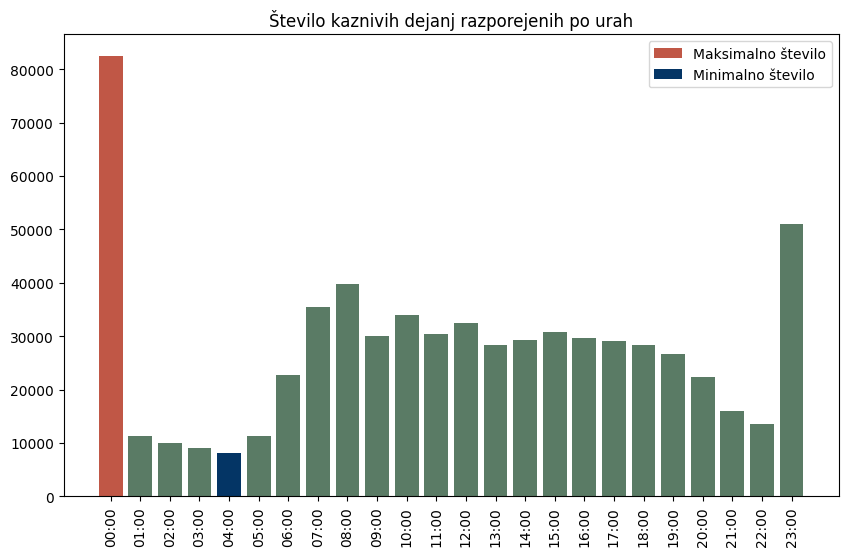

In [119]:
l = {}
ure = sorted(kd['UraStoritve'].unique())
for u in ure:
    l[u[:5]] = (np.unique(np.asarray(kd.loc[kd["UraStoritve"] == u, ['ZaporednaStevilkaKD']])).size)

u = [x[:5] for x in ure]
# u.insert(0, " ")
# l.insert(0, 0)

plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.title('Število kaznivih dejanj razporejenih po urah')
plt.bar(l.keys(), l.values(), color='#5A7B65')
plt.bar(*max(l.items(), key=lambda x:x[1]), color='#C05746')
plt.bar(*min(l.items(), key=lambda x:x[1]), color='#043565')
plt.legend(['_nolegend_', 'Maksimalno število', 'Minimalno število'])


In [120]:
vkd = list(kd['OpisKD'].unique())
vrstaKaznivihDejanj = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in vrstaKaznivihDejanj :
        vrstaKaznivihDejanj[v.split("'")[0].split('-')[-1].strip()] += np.unique(np.asarray(kd.loc[kd['OpisKD'] == v, ['ZaporednaStevilkaKD']])).size
    else:
        vrstaKaznivihDejanj[v.split("'")[0].split('-')[-1].strip()] = np.unique(np.asarray(kd.loc[kd['OpisKD'] == v, ['ZaporednaStevilkaKD']])).size

<BarContainer object of 10 artists>

/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


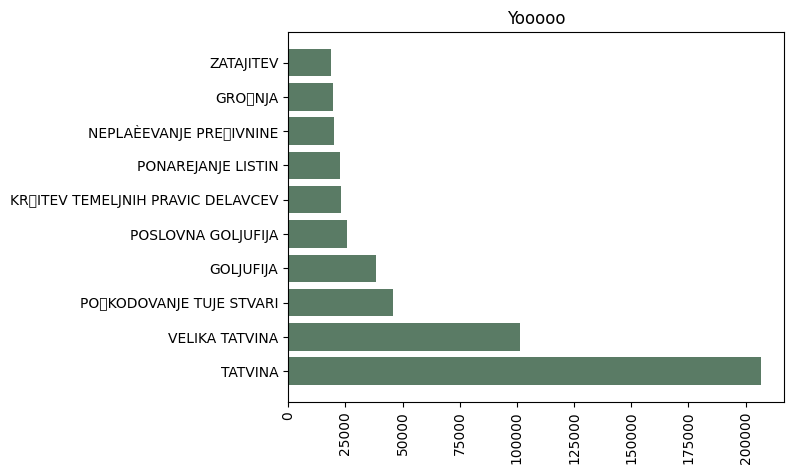

In [121]:
x, y = zip(*sorted(vrstaKaznivihDejanj.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('Yooooo')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

In [122]:
vkd = list(kd['OpisKD'].unique())
zrtveZ = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in zrtveZ:
        zrtveZ[v.split("'")[0].split('-')[-1].strip()] += np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == '\x8eENSKI') & (kd['VrstaOsebe'] == '\x8eRTEV'), ['ZaporednaStevilkaKD']]).size
    else:
        zrtveZ[v.split("'")[0].split('-')[-1].strip()] = np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == '\x8eENSKI') & (kd['VrstaOsebe'] == '\x8eRTEV'), ['ZaporednaStevilkaKD']]).size

<BarContainer object of 10 artists>

/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


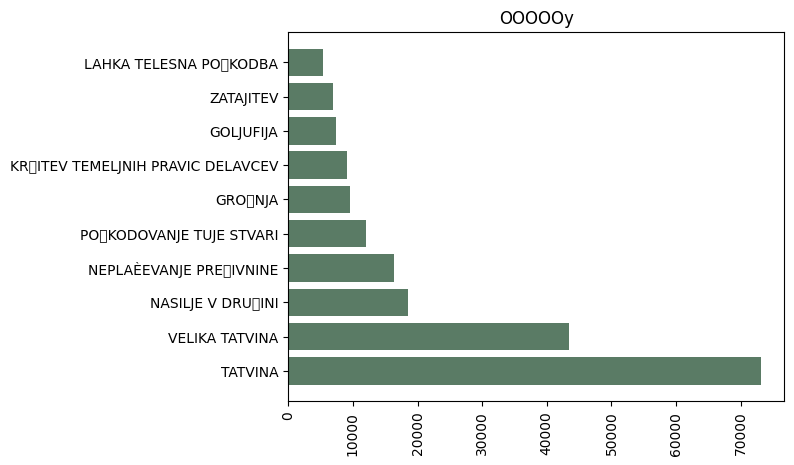

In [123]:
x, y = zip(*sorted(zrtveZ.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('OOOOOy')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

In [124]:
vkd = list(kd['OpisKD'].unique())
zrtveM = {}
for v in vkd:
    if v.split("'")[0].split('-')[-1].strip() in zrtveM:
        zrtveM[v.split("'")[0].split('-')[-1].strip()] += np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'MO\x8aKI') & (kd['VrstaOsebe'] == '\x8eRTEV'), ['ZaporednaStevilkaKD']]).size
    else:
        zrtveM[v.split("'")[0].split('-')[-1].strip()] = np.asarray(kd.loc[(kd['OpisKD'] == v) & (kd['Spol'] == 'MO\x8aKI') & (kd['VrstaOsebe'] == '\x8eRTEV'), ['ZaporednaStevilkaKD']]).size

<BarContainer object of 10 artists>

/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 138 (\x8a) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from current font.
  func(*args, **kwargs)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/ajo/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


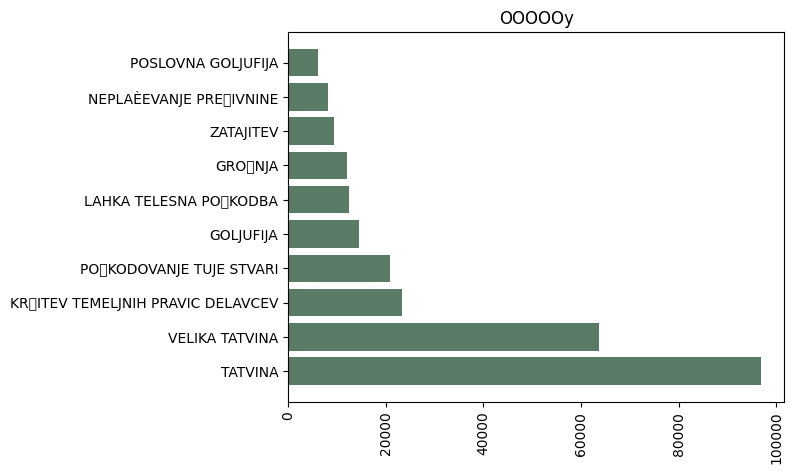

In [125]:
x, y = zip(*sorted(zrtveM.items(), key=lambda x: x[1], reverse=True)[:10])
plt.figure()
plt.title('OOOOOy')
plt.xticks(rotation=90)
plt.barh(x, y, color='#5A7B65')

In [126]:
zrtveZ['POSILSTVO'], zrtveM['POSILSTVO']

(731, 36)

In [127]:
nic = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'NE') & (kd['VplivMamil'] == 'NE'), ['ZaporednaStevilkaKD']])).size
alko = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'DA') & (kd['VplivMamil'] == 'NE'), ['ZaporednaStevilkaKD']])).size
droge = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'NE') & (kd['VplivMamil'] == 'DA'), ['ZaporednaStevilkaKD']])).size
oboje = np.unique(np.asarray(kd.loc[(kd['VplivAlkohola'] == 'DA') & (kd['VplivMamil'] == 'DA'), ['ZaporednaStevilkaKD']])).size

nic, alko, droge, oboje

(96843, 1746, 310, 233)